# Emily Lau (el639) - INFO 1998 Final Project

Link to the original dataset: https://www.kaggle.com/datasets/ealaxi/paysim1

### Hypothesis

There is a significant relationship between the transaction features and the likelihood of a transaction being fraudulent. 

### Questions
Based on various transaction features, can we predict whether a transaction is fraudulent or not? (classification)

How do different transaction features (e.g., amount, original balance, etc.) correlate with the payment type of the transaction?  (regression)

In [4]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt



In [5]:
original_data = pd.read_csv('card_transactions.csv', encoding="ISO-8859-1")
original_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


###
The original dataset has 6,362,620 rows. For efficiency reasons, I will be using the first 100,000 datapoints.

In [6]:
copy = original_data.copy()

copy = copy.head(100000)

copy

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,159929.0,155908.34,M1257036576,0.00,0.00,0,0
99996,10,PAYMENT,18345.49,C744303677,6206.0,0.00,M1785344556,0.00,0.00,0,0
99997,10,CASH_IN,183774.91,C104331851,39173.0,222947.91,C36392889,54925.05,0.00,0,0
99998,10,CASH_OUT,82237.17,C707662966,6031.0,0.00,C1553004158,592635.66,799140.46,0,0


# Data Cleaning

Some columns in this dataset are not useful for this project, so they will be removed.

In [7]:
edited_df = copy.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [10]:
edited_df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.0,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
99995,PAYMENT,4020.66,159929.0,155908.34,0.00,0.00,0
99996,PAYMENT,18345.49,6206.0,0.00,0.00,0.00,0
99997,CASH_IN,183774.91,39173.0,222947.91,54925.05,0.00,0
99998,CASH_OUT,82237.17,6031.0,0.00,592635.66,799140.46,0


In [11]:
# Check for null values in each column

edited_df.isna().sum()


type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### 
The dataset contains no null values, so I do not need to remove any.

In [12]:
#check the number of unique values in each column (specifically need to know the # of types)
edited_df.nunique(axis=0)

type                  5
amount            99470
oldbalanceOrg     58013
newbalanceOrig    48118
oldbalanceDest    53663
newbalanceDest    19158
isFraud               2
dtype: int64

In [13]:
#Need to know the five types of payments
print('unique types: ', edited_df.type.unique())

unique types:  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


### Encoding

The five different types need to converted into categorical data first. I will be using numbers 1-5 to indicate each type. 

If type is payment, then type = 1

If type is transfer, then type = 2

If type is cash out, then type = 3

If type is debit, then type = 4

If type is cash in, then type = 5


In [14]:

for x in range(0,len(edited_df)):
    if edited_df['type'][x] == 'PAYMENT':
        edited_df['type'][x] = 1
    elif edited_df['type'][x] == 'TRANSFER':
        edited_df['type'][x] = 2
    elif edited_df['type'][x] == 'CASH_OUT':
        edited_df['type'][x] = 3
    elif edited_df['type'][x] == 'DEBIT':
        edited_df['type'][x] = 4
    elif edited_df['type'][x] == 'CASH_IN':
        edited_df['type'][x] = 5

edited_df

/var/folders/8h/nb_z0f251jj7r5h17xrfc5t00000gn/T/ipykernel_3189/2964084369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edited_df['type'][x] = 1
/var/folders/8h/nb_z0f251jj7r5h17xrfc5t00000gn/T/ipykernel_3189/2964084369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edited_df['type'][x] = 2
/var/folders/8h/nb_z0f251jj7r5h17xrfc5t00000gn/T/ipykernel_3189/2964084369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edited_d

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.00,0.00,0
1,1,1864.28,21249.0,19384.72,0.00,0.00,0
2,2,181.00,181.0,0.00,0.00,0.00,1
3,3,181.00,181.0,0.00,21182.00,0.00,1
4,1,11668.14,41554.0,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
99995,1,4020.66,159929.0,155908.34,0.00,0.00,0
99996,1,18345.49,6206.0,0.00,0.00,0.00,0
99997,5,183774.91,39173.0,222947.91,54925.05,0.00,0
99998,3,82237.17,6031.0,0.00,592635.66,799140.46,0


In [15]:
edited_df['type'] = edited_df['type'].astype(int)

## Visualization

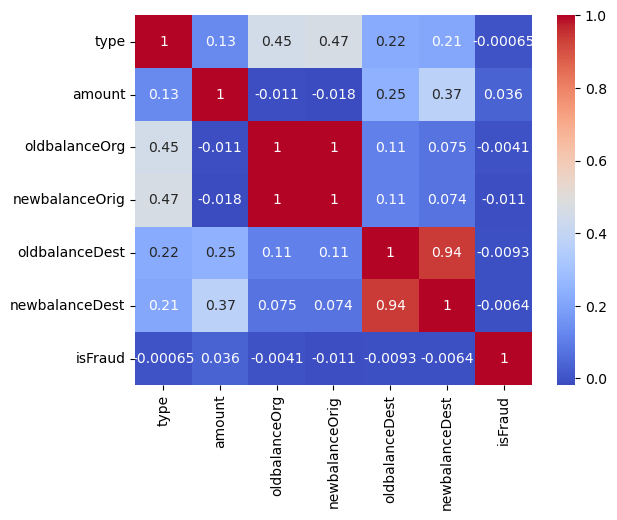

In [16]:
#correlation_columns = ['type','amount', 'oldbalanceOrg', 'newbalanceOrig','isFraud']

correlation_matrix = edited_df.corr()

sb.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

plt.show()

### 
Based on the correlation matrix, variables oldbalanceOrg and newbalanceOrg have the highest correlation with payment type. Variables amount and type have the highest correlation with isFraud, which is my initial assumption. I was not expecting the correlation values to be so low (0.00065 and 0.036), but those two are the highest out of the other variables. 

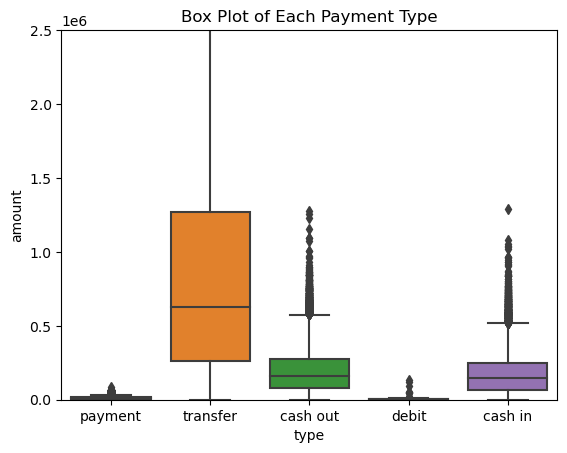

In [21]:
sb.boxplot(x='type',y='amount',data=edited_df)

plt.ylim(0,2500000)
plt.xticks([0,1,2,3,4],['payment','transfer','cash out','debit','cash in'])
plt.title('Box Plot of Each Payment Type')
plt.show()


Examining the boxplots for each transaction type reveals that Type 2, representing the transfer method, stands out the most amoung all five transaction types, displaying a wider range and higher transaction amounts associated with this specific type. Fraudulent transactions can occur across various types and can involve both high and low amounts. This boxplot, alone, cannot prove that transactions involving transfers are automatically labelled fraudulent. However, it is plausible that transaction types with higher chance of fraud have a greater dispersion within the dataset as scammers may transfer different amounts to evade detection. Nonetheless, this is only a hypothesis and requires further modeling or analysis.

# Machine Learning 

## Regression

This is the question that I am attempting to answer: How do different transaction features (e.g., amount, original balance, etc.) correlate with the payment type of the transaction?

In [42]:
model_balance = LinearRegression()
X = edited_df[['amount','oldbalanceOrg','newbalanceOrig']]
Y = edited_df['type']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .25, random_state = 42)

model_balance.fit(X_train,Y_train)

LinearRegression()

In [43]:
#store the predictions
pred_train = model_balance.predict(X_train)
pred_test = model_balance.predict(X_test)

#Calculate mean-squared error
balance_MSE = mean_squared_error(Y_test, pred_test)
print('MSE: ' + str(balance_MSE))
r_squared = model_balance.score(X_test,Y_test)
print('R-squared: ' + str(r_squared))


MSE: 1.487602915094201
R-squared: 0.34870262673227104


### Analysis
I was interested in analyzing how amount, oldbalanceOrg, and newbalanceOrig influence the transaction type. Based on the correlation matrix, both oldbalanceOrg and newbalanceOrig had relatively high correlation with the transaction type. I calculated both the mean-squared error and r-squared to assess the fit of the model. The MSE was 1.49 which is not signficantly far away from 0. The r-squared value was approximately .30. The ideal r-squared value is close to 1, but this value is not horrible. Being curious, I decided to see if the amount would affect the MSE and R-squared. The resulting new r-square value increased to 0.37. While the difference is not significantly great, this difference shows that these three transaction features do influence the transaction type. 


## Classification

My question is 'based on various transaction features, can we predict whether a transaction is fraudulent or not?'

 I'll be using the KNN classifier to predict whether a transaction is fraudulent or not. 

In [44]:
# Separate X (features) and Y (target)
X1 = edited_df[['type','amount','oldbalanceOrg']]
Y1 = edited_df['isFraud']

#Train test data with 25% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size = .2, random_state = 42)

#create the kNN model 
model_fraud = KNeighborsClassifier()

#Fit the model using the train data
model_fraud.fit(x_train,y_train)

#Store the predictions for the train and test sets
knn_pred_train = model_fraud.predict(x_train)
knn_pred_test = model_fraud.predict(x_test)

#Calculate the accuracy score of pred_fraud
print('Training accuracy:', accuracy_score(y_train,knn_pred_train))
print("Test accuracy:", accuracy_score(y_test,knn_pred_test))

Training accuracy: 0.9990125
Test accuracy: 0.99915


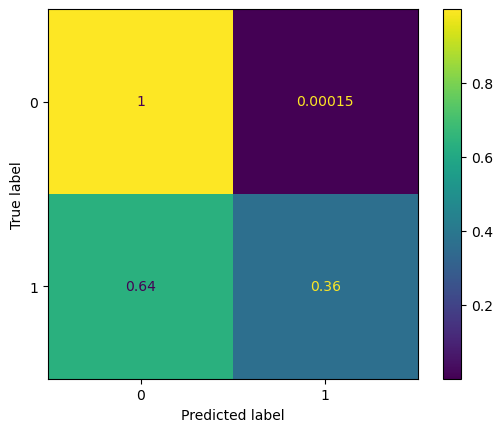

In [48]:

cm = confusion_matrix(y_test,knn_pred_test,normalize='true')
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot()


# Analysis


The classification model is designed to discern fraudulent transactions by considering three key characteristics: 1) type, 2) amount, and 3) oldbalanceOrg. Using the KNN Classifier, I was able to calculate the training and test accuracies, which were surprisingly high and almost the same. This suggests that the classification model is good at identifying whether a transaction is fraudulent. To answer the classification question, given these three specified features, I believe that this model can effectively predict the fraudulent nature of a transaction with considerable accuracy. I do want to note that for this project, I only used 100,000 datapoints, which is approximately 2% of the original dataset. For future research, I would use a larger dataset to maximize accuracy of my models. 

## Conclusion

Using the machine learning techniques I learned, I was able to tell that there is a relationship between the transaction features and the likelihood of a transaction being fraudulent. Based on the data, I cannot say for sure that there is a significant relationship, but it appears that certain transaction features do influence the likelihood. My hypothesis was not entirely wrong. 